In [1]:
import pandas as pd
import numpy as np
import os 

In [2]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [4]:
os.chdir('/content/drive/MyDrive/Colab Notebooks')

Concatenating all csv files into one as number of columns and data are identical

---



In [5]:
#ds = pd.read_csv("phone_user_review_file_1.csv")
ph_1 = pd.read_csv("phone_user_review_file_1.csv", sep=",", error_bad_lines=False, encoding="latin-1")
ph_2 = pd.read_csv("phone_user_review_file_2.csv", sep=",", error_bad_lines=False, encoding="latin-1")
ph_3 = pd.read_csv("phone_user_review_file_3.csv", sep=",", error_bad_lines=False, encoding="latin-1")
ph_4 = pd.read_csv("phone_user_review_file_4.csv", sep=",", error_bad_lines=False, encoding="latin-1")
ph_5 = pd.read_csv("phone_user_review_file_5.csv", sep=",", error_bad_lines=False, encoding="latin-1")
ph_6 = pd.read_csv("phone_user_review_file_6.csv", sep=",", error_bad_lines=False, encoding="latin-1")

In [6]:
print(ph_1.shape, ph_2.shape, ph_3.shape, ph_4.shape, ph_5.shape, ph_6.shape)

(374910, 11) (114925, 11) (312961, 11) (98284, 11) (350216, 11) (163837, 11)


In [7]:
ph = pd.concat([ph_1, ph_2, ph_3,ph_4, ph_5, ph_6])
print(ph.shape)

(1415133, 11)


In [8]:
ph.head()

,phone_url,date,lang,country,source,domain,score,score_max,extract,author,product
0,/cellphones/samsung-galaxy-s8/,5/2/2017,en,us,Verizon Wireless,verizonwireless.com,10.0,10.0,As a diehard Samsung fan who has had every Sam...,CarolAnn35,Samsung Galaxy S8
1,/cellphones/samsung-galaxy-s8/,4/28/2017,en,us,Phone Arena,phonearena.com,10.0,10.0,Love the phone. the phone is sleek and smooth ...,james0923,Samsung Galaxy S8
2,/cellphones/samsung-galaxy-s8/,5/4/2017,en,us,Amazon,amazon.com,6.0,10.0,Adequate feel. Nice heft. Processor's still sl...,R. Craig,"Samsung Galaxy S8 (64GB) G950U 5.8"" 4G LTE Unl..."
3,/cellphones/samsung-galaxy-s8/,5/2/2017,en,us,Samsung,samsung.com,9.2,10.0,Never disappointed. One of the reasons I've be...,Buster2020,Samsung Galaxy S8 64GB (AT&T)
4,/cellphones/samsung-galaxy-s8/,5/11/2017,en,us,Verizon Wireless,verizonwireless.com,4.0,10.0,I've now found that i'm in a group of people t...,S Ate Mine,Samsung Galaxy S8


In [9]:
ph.columns

Index(['phone_url', 'date', 'lang', 'country', 'source', 'domain', 'score',
       'score_max', 'extract', 'author', 'product'],
      dtype='object')

In [10]:
# check nan 
ph.isin([np.nan]).any()

phone_url    False
date         False
lang         False
country      False
source       False
domain       False
score         True
score_max     True
extract       True
author        True
product       True
dtype: bool

In [11]:
duplicate = ph[ph.duplicated()] 
print("Duplicate Rows :",duplicate) 

Duplicate Rows :                                       phone_url  ...                                            product
342              /cellphones/samsung-galaxy-s8/  ...                            Samsung Galaxy S8 Zwart
343              /cellphones/samsung-galaxy-s8/  ...                            Samsung Galaxy S8 Zwart
371              /cellphones/samsung-galaxy-s8/  ...                            Samsung Galaxy S8 Zwart
452              /cellphones/samsung-galaxy-s8/  ...                            Samsung Galaxy S8 Zwart
3718    /cellphones/samsung-galaxy-s6-edgeplus/  ...  Samsung Galaxy S6 Edge+, Black 64GB (Verizon W...
...                                         ...  ...                                                ...
146836                  /cellphones/nokia-8850/  ...                                         Nokia 8850
146838                  /cellphones/nokia-8850/  ...                                         Nokia 8850
158911             /cellphones/samsung-sgh-600/

In [12]:
#Removing duplicates rows
ph.drop_duplicates(inplace=True)


In [13]:
ph.isnull().sum()

phone_url        0
date             0
lang             0
country          0
source           0
domain           0
score        63093
score_max    63093
extract      19014
author       61817
product          1
dtype: int64

In [14]:
df1 = ph['score'][ph.isna().any(axis=1)].isna()
df1

270       False
456       False
489        True
490        True
491        True
          ...  
163706    False
163708    False
163712     True
163713    False
163800    False
Name: score, Length: 137270, dtype: bool

In [15]:
#Rounding the ratings
ph['score'] = ph['score'].round()


In [17]:
#Dropping the irrelivent column
ph.drop(['phone_url', 'date', 'lang', 'country', 'source', 'domain','score_max','extract'], axis=1,inplace=True)

In [18]:
ph.head()

,score,author,product
0,10.0,CarolAnn35,Samsung Galaxy S8
1,10.0,james0923,Samsung Galaxy S8
2,6.0,R. Craig,"Samsung Galaxy S8 (64GB) G950U 5.8"" 4G LTE Unl..."
3,9.0,Buster2020,Samsung Galaxy S8 64GB (AT&T)
4,4.0,S Ate Mine,Samsung Galaxy S8


In [19]:
#Imputing Nan with 0
ph['score'] = ph['score'].replace(np.nan,0)
ph['author'] = ph['author'].replace(np.nan,0)

In [20]:
ph['score'].isna().sum()

0

In [21]:
#Dropping score = 0 and author as Nan
ph = ph[ph.author != 0]
ph = ph[ph.score != 0]
print(ph.shape)

(1286341, 3)


In [22]:
ph.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1286341 entries, 0 to 163836
Data columns (total 3 columns):
 #   Column   Non-Null Count    Dtype  
---  ------   --------------    -----  
 0   score    1286341 non-null  float64
 1   author   1286341 non-null  object 
 2   product  1286341 non-null  object 
dtypes: float64(1), object(2)
memory usage: 39.3+ MB


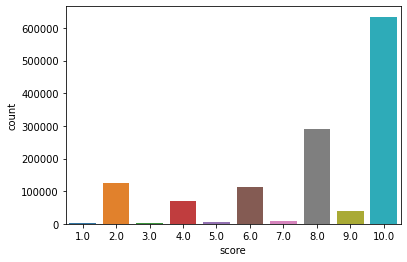

In [23]:
import seaborn as sns
sns.countplot(data=ph,x='score')

In [24]:
# Number of unique author in the data
print('Count: unique author = ', ph['author'].nunique())
# Number of unique product  in the data
print('Count: unique product = ', ph['product'].nunique())

Count: unique author =  778953
Count: unique product =  55274


In [25]:
#Identify the most rated product/feaure
ph.groupby('product')['score'].count().sort_values(ascending=False).head()  

product
Lenovo Vibe K4 Note (White,16GB)     5223
Lenovo Vibe K4 Note (Black, 16GB)    4389
OnePlus 3 (Graphite, 64 GB)          4103
OnePlus 3 (Soft Gold, 64 GB)         3557
Huawei P8lite zwart / 16 GB          2707
Name: score, dtype: int64

Lenovo Vibe K4 Note (White,16GB) is rated 5223 times

In [26]:
#Identify the avg score in descending order
ph.groupby('product')['score'].mean().sort_values(ascending=False).head()  

product
æ©æç½æ C168i                                        10.0
Nokia Pureview 808 Wit                                    10.0
Nokia Nokia Lumia 1520 Red                                10.0
Nokia Nokia E72 Black Smartphone - Unlocked               10.0
Nokia NOKIA206WHT Nokia 206 white Tesco mobile variant    10.0
Name: score, dtype: float64

In [27]:
#Identify the users with most number of reviews
ph.groupby('author')['score'].count().sort_values(ascending=False).head()  

author
Amazon Customer    76933
Cliente Amazon     19300
e-bit               8411
Client d'Amazon     7716
Amazon Kunde        4746
Name: score, dtype: int64

Amazon Customer has most number of reviews = 76933

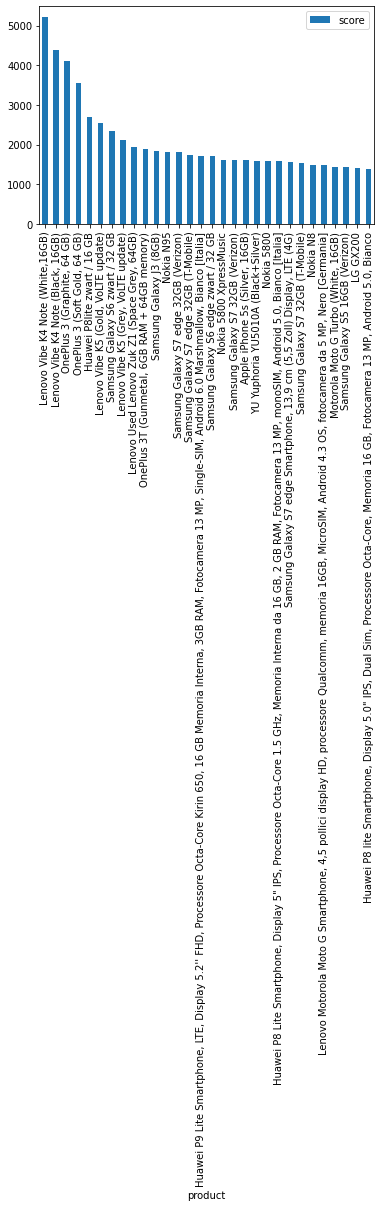

In [28]:
#Plotting popular products
popular_products = pd.DataFrame(ph.groupby('product')['score'].count())
most_popular = popular_products.sort_values('score', ascending=False)
most_popular.head(30).plot(kind = "bar")

**Select the data with products having more than 50 ratings and users who have given more than 50 ratings** 



In [29]:
#Select the data with products having more than 50 ratings and users who have given more than 50 ratings.

pdf1= ph.groupby('product').filter(lambda x: len(x)>50)  
ph_new = pdf1.groupby('author').filter(lambda x: len(x)>50)

 

In [30]:
ph_new.shape

(150884, 3)

***Build a popularity based model and recommend top 5 mobile phones***

In [31]:
#Build a popularity based model and recommend top 5 mobile phones
from sklearn.model_selection  import train_test_split
train_data, test_data = train_test_split(ph_new, test_size = 0.30, random_state=612)

In [32]:
#recommend function
def get_reccomedations(data,k):
    ph_product_Ratings = data.groupby('product')['score'].size().sort_values(ascending=False).head(k)
    return(ph_product_Ratings)

In [33]:
#recommend top 5 mobile phones test data
k=5
top5mobilephones=get_reccomedations(test_data,k)
top5mobilephones

product
Lenovo Vibe K4 Note (White,16GB)       913
Lenovo Vibe K4 Note (Black, 16GB)      798
OnePlus 3 (Graphite, 64 GB)            552
OnePlus 3 (Soft Gold, 64 GB)           523
Lenovo Vibe K5 (Gold, VoLTE update)    479
Name: score, dtype: int64

In [35]:
#recommend top 5 mobile phones train data
k=5
top5mobilephones=get_reccomedations(train_data,k)
top5mobilephones

product
Lenovo Vibe K4 Note (White,16GB)       2199
Lenovo Vibe K4 Note (Black, 16GB)      1773
OnePlus 3 (Graphite, 64 GB)            1323
OnePlus 3 (Soft Gold, 64 GB)           1257
Lenovo Vibe K5 (Gold, VoLTE update)    1111
Name: score, dtype: int64

In [37]:
!pip install surprise

     |████████████████████████████████| 11.8MB 5.7MB/s 
  Created wheel for scikit-surprise: filename=scikit_surprise-1.1.1-cp37-cp37m-linux_x86_64.whl size=1615274 sha256=64b855394a8dc62bda401bca5b421345f01646b13c17bcf72774663441081a57
  Stored in directory: /root/.cache/pip/wheels/78/9c/3d/41b419c9d2aff5b6e2b4c0fc8d25c538202834058f9ed110d0
Successfully built scikit-surprise


***#4. Build a collaborative filtering model using SVD.***

In [39]:
#4. Build a collaborative filtering model using SVD.
#Transform data to surprise format
from surprise import Dataset,Reader
from surprise.model_selection import cross_validate
from surprise import NormalPredictor
reader = Reader(rating_scale=(1, 10))

In [43]:
#converting df to surprise dataset
data1 = Dataset.load_from_df(ph_new[['author','product','score']],reader)
data1.df.tail(15)

,author,product,score
160897,anonym,Ericsson T18s,10.0
161237,anonym,Ericsson T10s,10.0
161250,anonym,Ericsson T10s,10.0
161259,anonym,Ericsson T10s,8.0
161422,anonym,Motorola Timeport L7089,8.0
161908,anonym,Mitsubishi Astral,8.0
162301,Ana,Motorola CD930,2.0
162666,anonym,Alcatel One Touch Easy db,4.0
162966,anonym,Philips Savvy,8.0
162975,anonym,Philips Savvy,8.0


In [44]:
#train_test_split 
from surprise.model_selection import train_test_split
trainset1, testset1 = train_test_split(data1, test_size=.3,random_state=612)

In [45]:
from surprise import SVD
from surprise import accuracy

In [46]:
#Apply SVD 
svd_model = SVD(n_factors=50,biased=False)
svd_model.fit(trainset1)

In [47]:
#predict values
test_pred1 = svd_model.test(testset1)

In [50]:
rmse_svd =accuracy.rmse(test_pred1)
print("RMSE for SVD = ",rmse_svd)

RMSE: 2.8492
RMSE for SVD =  2.849188077963436


In [106]:
#Cross Validate
cross_validate(svd_model ,data1,cv=5, measures=['RMSE', 'MAE'], verbose=True)

Evaluating RMSE, MAE of algorithm SVD on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    2.8057  2.8290  2.8119  2.8422  2.8273  2.8232  0.0130  
MAE (testset)     2.1878  2.1829  2.1648  2.1916  2.2138  2.1882  0.0158  
Fit time          4.80    4.68    4.73    4.72    4.75    4.74    0.04    
Test time         0.22    0.21    0.21    0.21    0.21    0.21    0.00    


{'fit_time': (4.802677631378174,
  4.682778835296631,
  4.733130693435669,
  4.719698905944824,
  4.751328706741333),
 'test_mae': array([2.18781862, 2.18291646, 2.16476422, 2.19159006, 2.21381317]),
 'test_rmse': array([2.80573211, 2.82901809, 2.81191307, 2.84224259, 2.82730555]),
 'test_time': (0.22127842903137207,
  0.2109849452972412,
  0.21329331398010254,
  0.20951151847839355,
  0.21123600006103516)}

In [67]:
test_pred1=pd.DataFrame(test_pred1)
# for userId, num= no of products
def get_reccomedations_Collaborative_SVD(userId,num):
  user_rec = test_pred1[test_pred1['uid'] == userId][['uid','iid','r_ui','est']].sort_values(by = 'est',ascending = False).head(num)
  return user_rec

In [76]:
testset1_data= pd.DataFrame(testset1)
testset1_data.head(5)


,0,1,2
0,Amazon Customer,YU Yuphoria YU5010A (Black+Silver),10.0
1,Amazon Kunde,Huawei P8 lite Dual-SIM Smartphone (5 Zoll (12...,4.0
2,Nicolas,Samsung S8500 Wave,9.0
3,anonym,Nokia 5530 XpressMusic,8.0
4,Amazon Customer,"BlackBerry Q10 Unlocked Cellphone, 16GB, Black",8.0


**Recommend top 5 products for test users**

In [74]:
#recommend top 5 products for test users. ( 5 points)
get_reccomedations_Collaborative_SVD('Amazon Customer',5)

,uid,iid,r_ui,est
21352,Amazon Customer,"Nokia Lumia 1020, Yellow 32GB (AT&T)",2.0,9.925794
29507,Amazon Customer,Samsung Galaxy S Duos II GT-S7582 Factory Unlo...,2.0,9.745644
30035,Amazon Customer,Samsung Galaxy S Duos II GT-S7582 Factory Unlo...,4.0,9.745644
23349,Amazon Customer,Samsung Galaxy S Duos II GT-S7582 Factory Unlo...,10.0,9.745644
1917,Amazon Customer,Samsung Galaxy S Duos II GT-S7582 Factory Unlo...,10.0,9.745644


In [77]:
get_reccomedations_Collaborative_SVD('Alejandro',5)

,uid,iid,r_ui,est
25709,Alejandro,Samsung Galaxy Nexus i9250 - Smartphone libre ...,8.0,10.000000
13644,Alejandro,"Asus Zenfone 2 ZE551ML- Smartphone Android, Pa...",10.0,10.000000
23948,Alejandro,Apple iPhone SE Unlocked Phone - 64 GB Retail ...,8.0,10.000000
2921,Alejandro,"APPLE iPhone 7 - Silver, 128 GB",10.0,9.714489
34890,Alejandro,Motorola Moto X,10.0,9.643525


**Build a collaborative filtering model using kNNWithMeans from surprise**

In [78]:
#Build a collaborative filtering model using kNNWithMeans from surprise
trainset2, testset2 = train_test_split(data1, test_size=.3,random_state=612)

In [80]:
from surprise import KNNWithMeans, accuracy, Prediction
# compute  similarities between items
algo_ub = KNNWithMeans(k=51, sim_options={'name': 'pearson' , 'user_based' : False})

In [81]:
algo_ub.fit(trainset2)

Computing the pearson similarity matrix...
Done computing similarity matrix.


In [83]:
test_pred2 = algo_ub.test(testset2)

In [ ]:
#test_pred2

In [84]:
rmse_1 = accuracy.rmse(test_pred2)
print("Item-based Model rmse = ",rmse_1)

RMSE: 2.8099
Item-based Model rmse =  2.8099470496470755


In [85]:
test_pred2_df = pd.DataFrame(test_pred2)
algo_ub.predict(uid = 'Amazon Customer', iid ='Celular Motorola EX115')

Prediction(uid='Amazon Customer', iid='Celular Motorola EX115', r_ui=None, est=7.259668508287293, details={'actual_k': 0, 'was_impossible': False})

In [87]:
algo_ub.predict(uid = 'Amazon Customer', iid ='Asus ZenFone 2 Laser Smartphone, Display da 5')

Prediction(uid='Amazon Customer', iid='Asus ZenFone 2 Laser Smartphone, Display da 5', r_ui=None, est=7.788161108901892, details={'was_impossible': True, 'reason': 'User and/or item is unknown.'})

In [88]:
testset_new2 = trainset2.build_anti_testset()

In [92]:
testset_new2[0:5]

[('Amazon Customer',
  'Sim Free Motorola Moto G 4th Generation Mobile Phone - Black',
  7.788161108901892),
 ('Amazon Customer',
  'Samsung Galaxy S4 mini Duos GT-I9192 (Ñ\x87ÐµÑ\x80Ð½Ñ\x8bÐ¹)',
  7.788161108901892),
 ('Amazon Customer',
  'Apple Apple iPhone 5s - 32GB - Zilver',
  7.788161108901892),
 ('Amazon Customer',
  'BLU Life Pure Unlocked Phone (Black)',
  7.788161108901892),
 ('Amazon Customer', 'Samsung Galaxy S3 Mini Smartphone', 7.788161108901892)]

In [90]:
predictions2 = algo_ub.test(testset_new2)

In [91]:
predictions2_df = pd.DataFrame([[x.uid,x.iid,x.est] for x in predictions2])

predictions2_df.head()

,0,1,2
0,Amazon Customer,Sim Free Motorola Moto G 4th Generation Mobile...,9.735535
1,Amazon Customer,Samsung Galaxy S4 mini Duos GT-I9192 (ÑÐµÑÐ½...,8.650585
2,Amazon Customer,Apple Apple iPhone 5s - 32GB - Zilver,9.402062
3,Amazon Customer,BLU Life Pure Unlocked Phone (Black),7.636514
4,Amazon Customer,Samsung Galaxy S3 Mini Smartphone,6.383544


In [ ]:
predictions2_df.columns = ["author","product","score"]
predictions2_df.sort_values(by=['author','score'],ascending=False,inplace=True)
#op_10_records = predictions2_df.groupby('author')['Amazon Customer']
#top_10_recommend
predictions2_df[predictions2_df['author'] =='Amazon Customer'].head(20).reset_index(drop=True)

,author,product,score
0,Amazon Customer,Sony Xperia Z1 Compact (ÑÐ¾Ð·Ð¾Ð²ÑÐ¹),10.0
1,Amazon Customer,Samsung S5830 Galaxy Ace,10.0
2,Amazon Customer,Samsung Galaxy S4 mini GT-I9190 (ÑÐ¸Ð½Ð¸Ð¹),10.0
3,Amazon Customer,Samsung Galaxy S5 SM-G900F 16GB (ÑÐµÑÐ½ÑÐ¹),10.0
4,Amazon Customer,Sony Xperia SP (ÐºÑÐ°ÑÐ½ÑÐ¹),10.0
5,Amazon Customer,BlackBerry Q5,10.0
6,Amazon Customer,Apple iPhone 5s 16GB (ÑÐµÑÑÐ¹ ÐºÐ¾ÑÐ¼Ð¾Ñ),10.0
7,Amazon Customer,Nokia X2-02 Bright Red,10.0
8,Amazon Customer,Sony Xperia M (Ð±ÐµÐ»ÑÐ¹),10.0
9,Amazon Customer,Huawei Ascend G600 (U8950),10.0


In [107]:
#Cross Validate
cross_validate(algo_ub, data1,cv=5, measures=['RMSE', 'MAE'], verbose=True) 

Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Evaluating RMSE, MAE of algorithm KNNWithMeans on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    2.7919  2.7962  2.8020  2.7793  2.7920  2.7923  0.0075  
MAE (testset)     2.1846  2.1924  2.1939  2.1759  2.1857  2.1865  0.0064  
Fit time          331.85  316.77  331.90  354.75  352.01  337.46  14.15   
Test time         588.13  579.43  590.35  594.82  597.00  589.94  6.13    


{'fit_time': (331.85257625579834,
  316.7697639465332,
  331.90155720710754,
  354.7497420310974,
  352.0115735530853),
 'test_mae': array([2.18457841, 2.19240407, 2.19387714, 2.17585607, 2.18567799]),
 'test_rmse': array([2.79189146, 2.79622395, 2.80195661, 2.77929102, 2.79198663]),
 'test_time': (588.1252284049988,
  579.425050497055,
  590.349116563797,
  594.8197050094604,
  596.9972274303436)}

In [93]:
## compute  similarities between users
algo_ib = KNNWithMeans(k=51, sim_options={'name': 'pearson' , 'user_based' : True})
algo_ib.fit(trainset2)
test_pred3 = algo_ib.test(testset2)
accuracy.rmse(test_pred3)

Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 2.7802


2.780220046542665

In [94]:
test_pred3_df = pd.DataFrame(test_pred3)
algo_ib.predict( iid ='Celular Motorola EX115',uid = 'Amazon Customer')

Prediction(uid='Amazon Customer', iid='Celular Motorola EX115', r_ui=None, est=7.955753340786004, details={'actual_k': 1, 'was_impossible': False})

In [95]:
predictions3 = algo_ib.test(testset_new2)

In [96]:
predictions3_df = pd.DataFrame([[x.uid,x.iid, x.est] for x in predictions3])
predictions3_df.head()

,0,1,2
0,Amazon Customer,Sim Free Motorola Moto G 4th Generation Mobile...,8.433385
1,Amazon Customer,Samsung Galaxy S4 mini Duos GT-I9192 (ÑÐµÑÐ½...,6.966893
2,Amazon Customer,Apple Apple iPhone 5s - 32GB - Zilver,7.050991
3,Amazon Customer,BLU Life Pure Unlocked Phone (Black),6.902678
4,Amazon Customer,Samsung Galaxy S3 Mini Smartphone,6.909197


In [101]:
#Predict score for test users. (
predictions3_df.columns = ["author","product","score"]
predictions3_df.sort_values(by=['product','score'],ascending=False,inplace=True)
#top_10_records = predictions3_df.groupby('author')['Amazon Customer']
#top_10_recommend

In [100]:
predictions3_df[predictions3_df['product'] =='Lenovo Vibe K4 Note (Black, 16GB)'].head(20).reset_index(drop=True)

,author,product,score
0,unknown,"Lenovo Vibe K4 Note (Black, 16GB)",10.000000
1,mauro,"Lenovo Vibe K4 Note (Black, 16GB)",10.000000
2,Rene,"Lenovo Vibe K4 Note (Black, 16GB)",10.000000
3,Nicolas,"Lenovo Vibe K4 Note (Black, 16GB)",10.000000
4,JD,"Lenovo Vibe K4 Note (Black, 16GB)",10.000000
5,Henk,"Lenovo Vibe K4 Note (Black, 16GB)",10.000000
6,George,"Lenovo Vibe K4 Note (Black, 16GB)",10.000000
7,Bart,"Lenovo Vibe K4 Note (Black, 16GB)",10.000000
8,Sven,"Lenovo Vibe K4 Note (Black, 16GB)",9.912892
9,michael,"Lenovo Vibe K4 Note (Black, 16GB)",9.857322


In [108]:
#Cross Validate
cross_validate(algo_ib, data1,cv=5, measures=['RMSE', 'MAE'], verbose=True) 

Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Evaluating RMSE, MAE of algorithm KNNWithMeans on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    2.7820  2.7728  2.7630  2.7681  2.7772  2.7726  0.0067  
MAE (testset)     2.1679  2.1565  2.1577  2.1511  2.1580  2.1582  0.0054  
Fit time          1.09    1.12    1.15    1.09    1.11    1.11    0.02    
Test time         6.72    6.96    6.92    6.71    6.77    6.82    0.10    


{'fit_time': (1.0855600833892822,
  1.115222454071045,
  1.1488897800445557,
  1.090759515762329,
  1.1086094379425049),
 'test_mae': array([2.16788373, 2.15646073, 2.15771973, 2.15109278, 2.15796381]),
 'test_rmse': array([2.78199665, 2.77284725, 2.76295035, 2.76808476, 2.77724105]),
 'test_time': (6.724894046783447,
  6.957316875457764,
  6.918423175811768,
  6.7116029262542725,
  6.768482685089111)}

Report your findings and inferences

unique author =  778953
unique product =  55274
Also we have taken authr and products havings more than 50 ratings, so matrix is well balanced.

1. The Popularity-based recommender system is non-personalised and the it shows same number of top recommendations irrespective of users.
2. User based Collaborative recommendation has rmse=2.7802, CV=2.7726(mean)  
3. Item based Collaborative recommendation has rmse=2.8099, CV=2.7923(mean)
4. collaborative filtering model using SVD has rmse=2.8492, CV=2.8232(mean)

User based CF recommendation has least RMSE value for given dataset

In what business scenario you should use popularity based Recommendation Systems?
Popular recommendation is non-personalised, so it is same for every user who is visiting any website. it will always show top popular recommendations
This information can be a starting point for user.
it is implemented in many business models by 
1. Amazon, Flipkart, to check top products in different categories
2. video search in youtube, dailymotion
3. Audio search n Amazon prime music, spotify, gaana


13. In what business scenario you should use CF based Recommendation Systems?

Collaborative Filtering, is personalised, it only needs information about users historical preference on a set of items. 
The core assumption here is that the users who have agreed in the past tend to also agree in the future. 
In terms of user preference, The rating can be direct or indirect.
Following two categories
Explicit Rating: It is a rating given by a user to an item in numeric form, . This is the most direct feedback from users to show how much they like an item. 
Implicit Rating: suggests users preference indirectly, such as page views, clicks, purchase records, whether or not listen to a music track, and so on.

Based on these information, CF based recommendation system finds place in
1. selective product purchased from Amazon, flipkart, myntra based on other user ratings
2. food items purchased from selective restaurant using user rating given to the restaurant or food item
3. Book recommendation

14. What other possible methods can you think of which can further improve the recommendation for different users?

Sparsity: The user/rating should be balanced matrix.
Clustering item: Users who have similar preference in one category of items may have totally different views on items of another kind. So cluster of items can be formed, similarity between users does not change significantly in the cluster, and average rating can be compared fom the cluster to the user who is selecting the item.
user-based CF model: ditch user based CF, as it is difficult to find other users who have historically shown similar preferences to a given user,
Use Item-based CF model:  In many cases items are static, and number of items are unaffected by the users, the set of items changes much less frequently than the number of users.